# Affichages des données

Ce notebook regroupe des tests sur l'ensemble des fonctions d'affichages

## Spectrogramme

## Spectrogramme

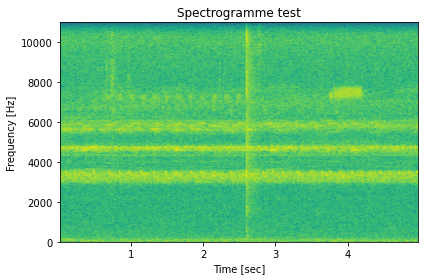

In [1]:
from affichageDonnees import displaySpectrogram
from utils import getSoundAtPosition
from matplotlib import pyplot as plt

root = './SoundDatabase'
sound, fs = getSoundAtPosition(root, 10, 5)

ax = plt.axes()
displaySpectrogram(sound, fs, "Spectrogramme test", ax)


## Représentation temporelle

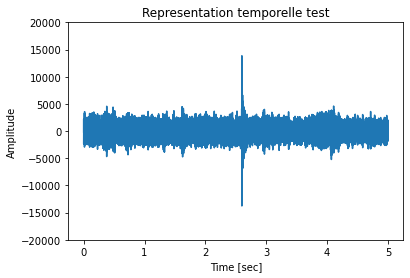

In [2]:
from affichageDonnees import displaySound
from utils import getSoundAtPosition
from matplotlib import pyplot as plt

root = './SoundDatabase'
sound, fs = getSoundAtPosition(root, 10, 5)

ax = plt.axes()
displaySound(sound, fs, 5, "Representation temporelle test", ax)

## Représentation polaire d'un échantillonnage de sons

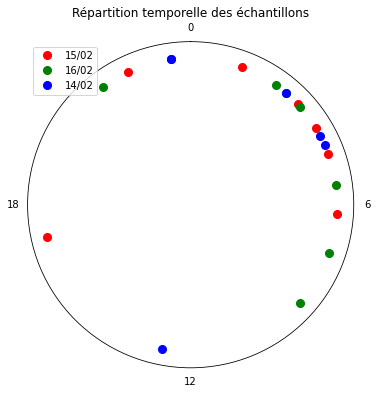

In [3]:
from affichageDonnees import displayPolarSamples
from echantillonnages import sampling_pertinence

samples, _ = sampling_pertinence(20)

displayPolarSamples(samples)

## Tracé de la pertinence

c:\Users\OUTIDRARINE\Desktop\DATASIM\DATASIM\DETPOP\repo\Detpop\affichageDonnees.py:102: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(samples != []):


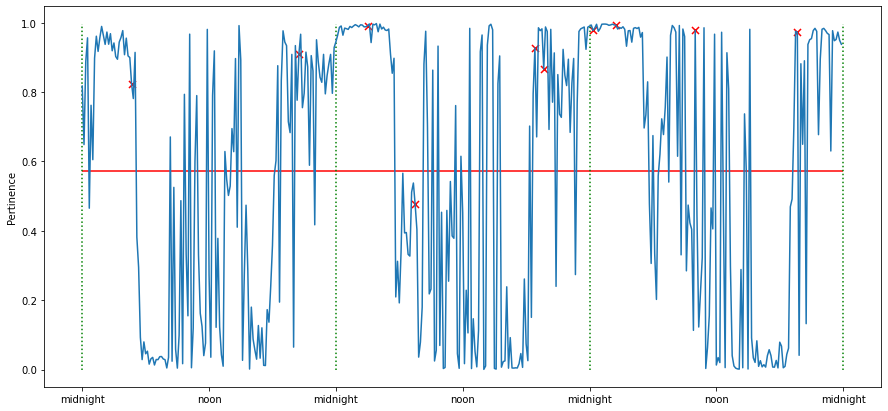

In [4]:
from affichageDonnees import displayPertinences
from echantillonnages import sampling_dpp

samples, _ = sampling_dpp(10)

displayPertinences(pertinenceFunction = 'identity', samples = samples)

## Affichage de la matrice des similarités

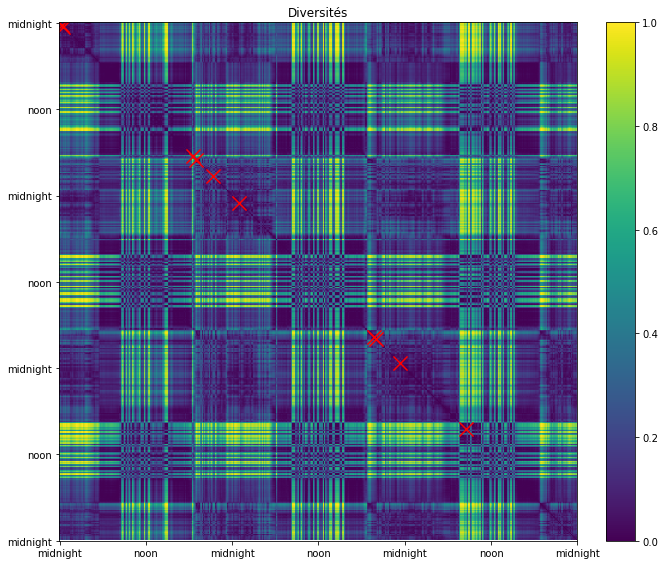

In [5]:
from affichageDonnees import displayDiversities
from echantillonnages import sampling_dpp

samples, _ = sampling_dpp(10)

displayDiversities(samples = samples)

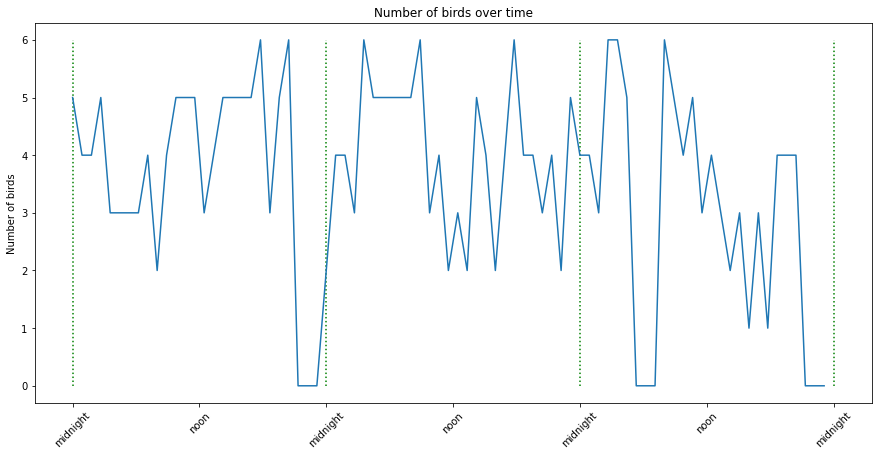

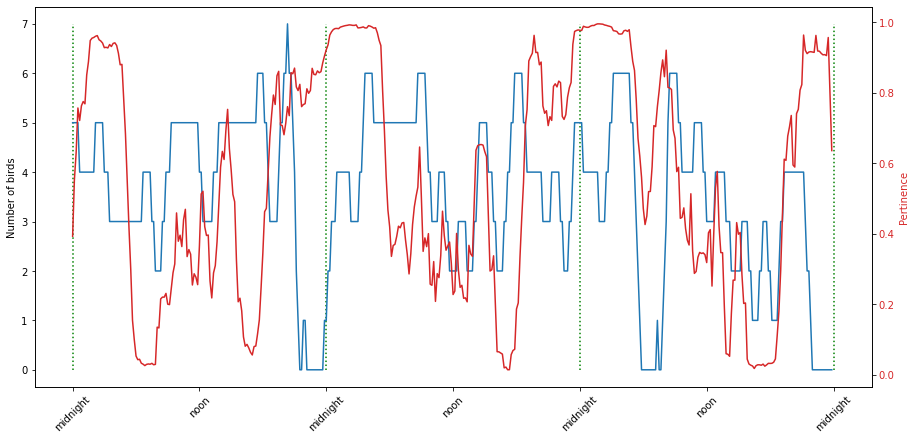

In [6]:
#from affichageDonnees import displayBirdsOverTime
from utils import getDateFromFilename
from utils import extract_birds
from matplotlib import pyplot as plt
from constructionPsi import getPertinences
import os 
from affichageDonnees import displayBirdsOverTime

bird_search_mode = 'single'
bird_confidence_limit = 0.1
windowLenghthForPertinence = 6 ## fenetrage pour la courbe de pertinences
displayBirdsGraphToo = True ## afficher aussi la courbe des nombres des oiseaux par heure


displayBirdsOverTime(root = './SoundDatabase', bird_search_mode = bird_search_mode, bird_confidence_limit = bird_confidence_limit, numberOfHours = 1, withPertinenceCurve = False, displayBirdsGraphToo=displayBirdsGraphToo, windowLenghthForPertinence = windowLenghthForPertinence)



In [7]:
from affichageDonnees import showPertinenceWithBirdsNumberHistogram
showPertinenceWithBirdsNumberHistogram(root = './SoundDatabase', bird_search_mode, bird_confidence_limit, windowLenghthForPertinence)

UnboundLocalError: local variable 'root' referenced before assignment